### Premier League Club Investment Analysis for an Investment company (EDA)

**Context:**

A renowned investment firm usually invest in top-tier sports teams that have potential. The dataset in their possession comprises crucial information about all the clubs that have participated in premier league (assume that it has the data for all clubs). It includes data on the number of goals scored, the number of times they have finished in the top two positions and other relevant details.

**Data Dictionary:**

- Club: Name of the football club
- Matches: Number of matches the club has played in the Premier League
- Wins: Number of matches won by the club in the Premier League
- Loss: Number of matches lost by the club in the Premier League
- Draws: Number of matches drawn by the club in the Premier League
- Clean Sheets: Number of matches in which the club has prevented the opposing side from scoring
- Team Launch: Year in which the club was founded
- Winners: Number of times the club has won the Premier League
- Runners-up: Number of times the club has finished as runners-up in the Premier League
- lastplayed_pl: Year in which the team last played in the Premier League

**Project Objective**

The management of the firm aims to invest in one of the top-performing club in the English Premier League. To aid in their decision-making process, the analytics department has been tasked with creating a comprehensive report on the performance of various clubs. However, some of the more established clubs have already been owned by the competitors. As a result, the firm wishes to identify the clubs they can approach and potentially invest to ensure a successful and profitable deal.

In [12]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("Premier_League_Final_Data.csv")

In [6]:
df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,1Arsenal,1182,642,252,288,2089,448,1886,3.0,6,Apr-23
1,2Aston Villa,1062,368,399,295,1306,311,1874,0.0,1,Apr-23
2,3Birmingham City,266,73,111,82,273,66,1875,0.0,NaN,May-11
3,4Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,May-12
4,5Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,May-12


In [7]:
df.tail()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
35,36West Bromwich Albion,494,117,238,139,510,107,1878,NaN,0,Apr-18
36,37West Ham United,1025,343,423,259,1262,266,1895,NaN,0,Apr-23
37,38Wigan Athletic,304,85,143,76,316,73,1932,NaN,0,Apr-13
38,39Wolverhampton Wanderers,334,98,151,85,353,75,1877,0.0,0,Apr-23
39,40Portsmouth,266,79,122,65,292,61,April 1898,NaN,NaN,Apr-10


In the above head and tail of the dataset we are observing the data of premier league, it includes club name and other 10 features which are giving information about the club. however the entire data is not clean we can see that club names are attached with some numerical values and also null values are present in the runners-up column.

And in the tail we can see null values in winners and runner-up and there is an inconsistency in the TeamLaunch column, most of them are with year and the last one club has month name and year.

In [8]:
df.shape

(40, 11)

There are 40 rows and 11 columns in the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Club            40 non-null     object 
 1   Matches Played  40 non-null     int64  
 2   Win             40 non-null     int64  
 3   Loss            40 non-null     int64  
 4   Drawn           40 non-null     int64  
 5   Goals           40 non-null     int64  
 6   Clean Sheets    40 non-null     int64  
 7   TeamLaunch      40 non-null     object 
 8   Winners         25 non-null     float64
 9   Runners-up      22 non-null     object 
 10  lastplayed_pl   40 non-null     object 
dtypes: float64(1), int64(6), object(4)
memory usage: 3.6+ KB


There are 40 non null values in each column, indicating that there is no missing values. However null values observed in the Runners-up and winners column as observed earlier. The datatype for the runner up column is non-numeric, to perform any numerical analysis on this column, we need to convert it into a numeric datatype.

#### Data Cleaning

In [13]:
df['Club']=df['Club'].str.replace('\d+', '')

# ''''''here \d+ it will match any consecutive sequence of digits in string, 
#in simple words it is pattern indicator, it will indentify the number in the string''''''

In [15]:
df['Winners'].isnull().any()

True

In [16]:
df['Winners'].value_counts()

0.0     18
1.0      3
3.0      1
5.0      1
6.0      1
13.0     1
Name: Winners, dtype: int64

interpretation -There are 18teams who didn't win a single match, then there are 3 teams who won 1 time and then there is one team which won for 13 times....

This implies that all other clubs in the dataset have not won any Premier League matches. Therefore, it would be appropriate to update the "Winners" column by replacing the null values with 0, as these clubs have not won the Premier League title. This data cleaning step will ensure that the dataset accurately reflects the historical performance of each club in terms of Premier League wins.

In [17]:
df['Winners'].fillna(0, inplace=True)

In [18]:
df['Winners'].isnull().any()

False

In [19]:
df['Runners-up'].value_counts()

0    10
1     3
-     3
6     1
4     1
5     1
3     1
7     1
2     1
Name: Runners-up, dtype: int64

In [20]:
df['Runners-up'].isnull().any()

True

In [26]:
df['Runners-up'].fillna(0, inplace=True)
df['Runners-up'].replace('-', 0, inplace=True)
# replace() method is used to replace the "-" values with zero. The inplace=True argument is used to modify the original

In [24]:
df['Runners-up'].isnull().any()

False

In [25]:
# Also we have seen it earlier that 'Runners-up' column is "Object" type let us convert it into int type
df['Runners-up'] = pd.to_numeric(df['Runners-up'], errors='coerce')
df['Runners-up'] = df['Runners-up'].astype('Int64')

This code is converting the "Runners-up" column in a pandas DataFrame, df, from an "Object" data type to an "Int64" data type.

The first line uses the pd.to_numeric() function to attempt to convert the "Runners-up" column to a numeric data type. The errors='coerce' argument tells the function to replace any values that cannot be converted to a number with NaN.

The second line uses the .astype() method to convert the "Runners-up" column to an "Int64" data type. The .astype() method is called on the "Runners-up" column of the DataFrame, and the argument "Int64" specifies the desired data type.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Club            40 non-null     object 
 1   Matches Played  40 non-null     int64  
 2   Win             40 non-null     int64  
 3   Loss            40 non-null     int64  
 4   Drawn           40 non-null     int64  
 5   Goals           40 non-null     int64  
 6   Clean Sheets    40 non-null     int64  
 7   TeamLaunch      40 non-null     object 
 8   Winners         40 non-null     float64
 9   Runners-up      40 non-null     Int64  
 10  lastplayed_pl   40 non-null     object 
dtypes: Int64(1), float64(1), int64(6), object(3)
memory usage: 3.6+ KB


In [29]:
# We also observed TeamLaunch column has data inconsistency

df['TeamLaunch'].value_counts()

1878           3
1886           2
1905           2
1874           2
1892           2
1879           2
1884           2
1882           2
1875           2
1895           1
1881           1
1904           1
1932           1
1912           1
1863           1
1877           1
1885           1
1867           1
1889           1
1894           1
1865           1
1902           1
1876           1
1919           1
16 Oct 1878    1
1861           1
Aug 1883       1
1901           1
1899           1
April 1898     1
Name: TeamLaunch, dtype: int64

In [30]:
# We need to convert the 'TeamLaunch' into 'YYYY'

# convert the column to datetime format
df['TeamLaunch'] = pd.to_datetime(df['TeamLaunch'], errors='coerce')

# convert the column to YYYY format
df['TeamLaunch'] = df['TeamLaunch'].dt.strftime('%Y')

The first line of code converts the column 'column_name' to datetime format using the pandas to_datetime() function. The 'errors' parameter is set to 'coerce', which means that any invalid dates will be set to NaT (Not a Time) in the resulting datetime column.

The second line of code uses the dt.strftime() method to convert the datetime column to a string column with only the year values. '%Y' is the format code for the year. This line of code will create a new column 'column_name' in the format YYYY.

In [33]:
df['TeamLaunch'].value_counts()

1878    4
1886    2
1905    2
1874    2
1892    2
1879    2
1884    2
1882    2
1875    2
1895    1
1881    1
1889    1
1932    1
1912    1
1877    1
1863    1
1885    1
1867    1
1894    1
1904    1
1865    1
1902    1
1876    1
1919    1
1861    1
1883    1
1901    1
1899    1
1898    1
Name: TeamLaunch, dtype: int64

In [35]:
# Let us explore column 'lastplayed_pl'
df.dtypes['lastplayed_pl']

dtype('O')

In [37]:
df['lastplayed_pl'].value_counts()

2023    19
2022     3
2017     3
2018     3
2012     2
2011     1
2007     1
2001     1
2008     1
2002     1
2015     1
2021     1
2000     1
2013     1
2010     1
Name: lastplayed_pl, dtype: int64

In [36]:
# Let us extract only the year in lastplayed_pl column
df['lastplayed_pl'] = (pd.to_datetime(df['lastplayed_pl'], format='%b-%y', errors='coerce')).dt.year

#The "format" parameter specifies the expected format of the input string. 
#In this case '%b-%y' which indicates a three-letter month abbreviation followed by a two-digit year (e.g. "Mar-21")

In [38]:
df['lastplayed_pl']

0     2023
1     2023
2     2011
3     2012
4     2012
5     2023
6     2023
7     2022
8     2007
9     2023
10    2001
11    2023
12    2008
13    2023
14    2023
15    2002
16    2023
17    2023
18    2023
19    2023
20    2023
21    2017
22    2023
23    2022
24    2023
25    2017
26    2015
27    2021
28    2000
29    2023
30    2018
31    2017
32    2018
33    2023
34    2022
35    2018
36    2023
37    2013
38    2023
39    2010
Name: lastplayed_pl, dtype: int64

### Deep dive into Data Analysis

In [39]:
# Calculate basic data summaries

df.describe()

,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,Winners,Runners-up,lastplayed_pl
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.0,40.000000
mean,573.750000,215.450000,210.425000,147.875000,769.000000,167.925000,0.750000,0.75,2018.000000
std,358.986519,194.164608,102.132364,88.873632,627.746478,135.561584,2.372384,1.750458,6.876195
min,190.000000,41.000000,85.000000,48.000000,181.000000,45.000000,0.000000,0.0,2000.000000
25%,275.000000,80.500000,127.500000,71.500000,304.500000,66.000000,0.000000,0.0,2014.500000
50%,443.000000,116.500000,193.500000,120.000000,462.000000,104.000000,0.000000,0.0,2022.000000
75%,934.750000,295.750000,263.000000,222.000000,1142.750000,244.250000,0.000000,0.0,2023.000000
max,1182.000000,720.000000,429.000000,329.000000,2229.000000,491.000000,13.000000,7.0,2023.000000


The average number of matches played by each team in the tournament is 573.75, while the mean number of goals scored by all teams is 769. However, the median number of goals scored is much lower at 462, indicating that some teams have scored significantly more goals than others.

Interestingly, the median number of wins and runners-up positions are both 0, suggesting that most teams have not won or finished as runners-up in the tournament. However, there is one team that has won the tournament a remarkable 13 times and another team that has been the runners-up 7 times. It would be interesting to find out which teams these are.

In [40]:
# Team that has won Premier League 13 times
df[df['Winners']==13]['Club']

20    Manchester United
Name: Club, dtype: object

In [41]:
# Team that has been runner-up 7 times
df[df['Runners-up']==7]['Club']

20    Manchester United
Name: Club, dtype: object

We see that Manchester United has won Premier league 13 times and have been runner-up 7 times.

In [42]:
import matplotlib.pyplot as plt

%matplotlib inline

Text(0.5, 1.0, 'Histogram of Matches Played')

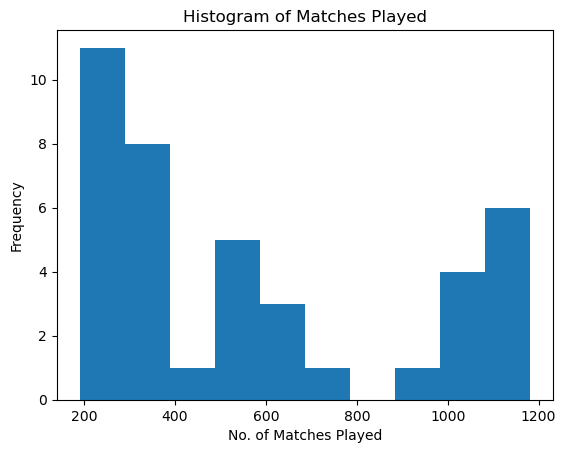

In [43]:
# Let us visualize each column

# First let us start with Matches Played column
# plot histogram
plt.hist(df['Matches Played'])

# add labels and title
plt.xlabel('No. of Matches Played')
plt.ylabel('Frequency')
plt.title('Histogram of Matches Played')

We can see from the histogram that a majority of teams have played less than 400 matches. However, there are a few teams that have played an exceptionally high number of matches, exceeding 900.

As per the project requirements, it is worth noting that some of the more established clubs have already been owned by the competitors. Therefore, the client is interested in identifying potential clubs that may perform well in the future, even if they have less experience in the Premier League.

In [44]:
# Identify teams who have played more than 900 matches

df[df['Matches Played']>=900]['Club']

0               Arsenal
1           Aston Villa
9               Chelsea
13              Everton
18            Liverpool
19      Manchester City
20    Manchester United
22     Newcastle United
29          Southampton
33    Tottenham Hotspur
36      West Ham United
Name: Club, dtype: object

Upon analysis, we have observed that there are a total of 11 clubs who have significantly more experience in the Premier League as compared to the others. These clubs have played a higher number of matches and have established themselves as experienced players in the league.

As per the client's requirements, we are interested in identifying potential clubs that may perform well in the future, even if they have less experience in the Premier League. Therefore, we have decided to drop these 11 clubs from our analysis, as their established presence in the league may skew our results and make it difficult to identify less experienced clubs with high potential.

By removing these clubs, we can focus our analysis on the remaining clubs and potentially identify hidden gems that may have been overlooked due to their lack of experience in the league.

In [45]:
df[df['Matches Played'] < 900]

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
2,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011
3,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012
4,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012
5,Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023
6,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023
7,Burnley,304,83,145,76,300,78,1882,0.0,0,2022
8,Charlton Athletic,304,93,129,82,342,91,1905,0.0,0,2007
10,Coventry City,354,99,143,112,387,92,1883,0.0,0,2001
11,Crystal Palace,532,153,241,138,576,133,1861,0.0,0,2023
12,Derby County,266,68,128,70,271,66,1884,0.0,0,2008


In [46]:
df = df[df['Matches Played'] < 900].reset_index(drop=True)

In [47]:
# view data

df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012
2,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012
3,Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023


In [48]:
df.shape

(29, 11)

It is essential to understand that the values in all the columns represent the cumulative scores over all the matches played.

To accurately analyze the performance of the teams, we must normalize the data by dividing the no. of wins, loss, drawn, clean sheet, goals by the number of matches played.

This normalization will provide us with a fair idea of the winning, losing, draw, and clean sheet percentages of each team along with goals per match

In [49]:
# Create new columns for Winning Rate, Loss Rate, Draw Rate, & Clean Sheet Rate
df['Winning Rate'] = (df['Win'] / df['Matches Played'])*100
df['Loss Rate'] = (df['Loss'] / df['Matches Played'])*100
df['Drawn Rate'] = (df['Drawn'] / df['Matches Played'])*100
df['Clean Sheet Rate'] = (df['Clean Sheets'] / df['Matches Played'])*100

In [50]:
# Create a column for average goals scored per match

df['Avg Goals Per Match']=df['Goals']/df['Matches Played']

df['Avg Goals Per Match']=df['Avg Goals Per Match'].round()

In [51]:
# View data
df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match
0,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011,27.443609,41.729323,30.827068,24.812030,1.0
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0
2,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012,30.161943,43.927126,25.910931,21.862348,1.0
3,Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023,29.223744,48.858447,21.917808,20.547945,1.0
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023,27.981651,38.990826,33.027523,26.605505,1.0


New columns are succesfully added in the dataframe

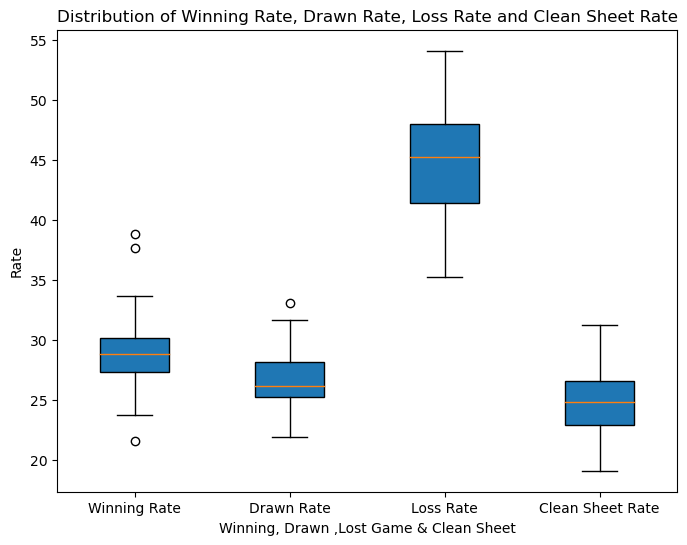

In [52]:
# Now let us visualize Winning, Loss, Drawn rate, and Clean Sheet

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the boxplot
boxplot = plt.boxplot([df['Winning Rate'], df['Drawn Rate'], df['Loss Rate'], df['Clean Sheet Rate']], 
                      patch_artist=True,
                      labels=['Winning Rate', 'Drawn Rate', 'Loss Rate', 'Clean Sheet Rate'])

# Set the title and axis labels
plt.title('Distribution of Winning Rate, Drawn Rate, Loss Rate and Clean Sheet Rate')
plt.xlabel('Winning, Drawn ,Lost Game & Clean Sheet')
plt.ylabel('Rate')

# Show the plot
plt.show()

**Winning Rate**

We observe that there are a few outliers in the Winning Rate boxplot, which are located above the upper whisker. It is safe to conclude that these outlier clubs have shown exceptional winning rates compared to the other clubs. Let us identify them ahead.

Also let us identify the club that has least "Winning Rate"

**Drawn Rate**

We observe an outlier in the drawn rate boxplot, indicating that there is one clubs has a much higher drawn rate compared to others. This may not necessarily be a positive indication, as it suggests that the club may struggle to secure wins in their matches. Going further let us identify which club is this.

**Loss Rate**

We can see very clearly that loss rates for these clubs are high compared to winning rate.

**Clean Sheet Rate**

We see that data for Clean Sheet rate is pretty symmetric.

In [53]:
# Winning Rate further analysis. Identify clubs with high winning rate

# Calculate the interquartile range for the "Winning Rate" column
Q1 = df['Winning Rate'].quantile(0.25)
Q3 = df['Winning Rate'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the upper boundaries for potential outliers <-- Expectional high winning rate compared to other teams
upper_bound = Q3 + 1.5 * IQR

# Identify the clubs with high winning rate 
highwinningrate = df[(df['Winning Rate'] > upper_bound)]
highwinningrate

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0
12,Leeds United,574,223,202,149,784,179,1919,0.0,0,2023,38.850174,35.191638,25.958188,31.184669,1.0


Upon analyzing the data, we have found that two teams, Leeds United and Blackburn Rovers, have exceptionally high winning rates of 39% and 38% respectively.

In [54]:
# Winning Rate further analysis. Identify club with low winning rate

# Calculate the lower boundaries for potential outliers <-- Low winning rate compared to other teams
lower_bound = Q1 - 1.5 * IQR

# Identify the clubs with lowest winning rate 
lowwinningrate = df[(df['Winning Rate'] < lower_bound)]
lowwinningrate

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match
17,Hull City,190,41,101,48,181,58,1904,0.0,0,2017,21.578947,53.157895,25.263158,30.526316,1.0


Club is lowest winning rate of 22% is Hull City

In [55]:
# Drawn Rate further analysis. Identify club with high drawn rate
# Calculate the interquartile range for the "Drawn Rate" column
Q1 = df['Drawn Rate'].quantile(0.25)
Q3 = df['Drawn Rate'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the upper boundaries for potential outliers <-- Expectional high winning rate compared to other teams
upper_bound = Q3 + 1.5 * IQR

# Identify the clubs with high winning rate 
highwinningrate = df[(df['Drawn Rate'] > upper_bound)]
highwinningrate

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023,27.981651,38.990826,33.027523,26.605505,1.0


Brighton & Hove Albion is expectionally high Drawn Rate of 33%

In [56]:
# Now let us explore 'Avg Goals Per Match' column

df['Avg Goals Per Match'].describe()

count    29.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: Avg Goals Per Match, dtype: float64

In [57]:
# Let us explore columns 'Winners' and 'Runners-up'

df['Winners'].value_counts()

0.0    27
1.0     2
Name: Winners, dtype: int64

In [58]:
df['Runners-up'].value_counts()

0    28
1     1
Name: Runners-up, dtype: Int64

We observe that out of the 29 clubs, only 2 clubs have won the Premier League, and one club has been a runner-up. Let us identify these clubs

In [59]:
df[(df['Winners']==1) | (df['Runners-up']==1)]

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0
13,Leicester City,642,216,262,164,860,167,1884,1.0,0,2023,33.644860,40.809969,25.545171,26.012461,1.0


Blackburn Rovers have won Premier League once and been an Runners-up once and Leicester City has won Premier League once.

In [60]:
# Lets us again analyse Matches Played Column for our reduced dataframe (29 clubs).

df['Matches Played'].describe()

count     29.000000
mean     372.482759
std      153.533296
min      190.000000
25%      266.000000
50%      305.000000
75%      494.000000
max      696.000000
Name: Matches Played, dtype: float64

Average matches played are 372.

In [61]:
# Let us look at "lastplayed_pl" column
df['lastplayed_pl'].value_counts()

2023    8
2022    3
2017    3
2018    3
2012    2
2011    1
2007    1
2001    1
2008    1
2002    1
2015    1
2021    1
2000    1
2013    1
2010    1
Name: lastplayed_pl, dtype: int64

Out of the total 29 teams, eight are currently playing in the Premier League. Since these teams are currently active in the league, it makes sense to prioritize them in our analysis. However, there are also teams that date back as early as 2000. It may be appropriate to assign these teams less weight.

In [62]:
# Let us check the eight teams that are currently playing in the Premier League

df[df['lastplayed_pl']==2023]['Club']

3                 Bournemouth
4      Brighton & Hove Albion
8              Crystal Palace
10                     Fulham
12               Leeds United
13             Leicester City
16          Nottingham Forest
27    Wolverhampton Wanderers
Name: Club, dtype: object

Giving more priority to teams that have more recent experience playing in the Premier League is ideal. When making the final decision, we will assign higher weight to teams that have played more recently, and lesser weight to those that have not played recently.

### Final Recommendations Framework

Let's create a plan to Score each team on the pre defined metric.

- Give a score of 10 if club have a relatively high experience in the Premier League above average (372)
- Give a score of 15 if club has winning rate above Q3
- Give a score of 15 if club has lossing rate below Q1
- Give a score of 10 if club drawn rate below Q1 and losing rate is below Q1
- Give a score of 10 if club has clean sheet above Q3 and winning rate is above Q3
- Give a score of 15 if club has won premier league
- Give a score of 10 if club has been a runners-up in premier league
- Give a score of 15 if club has been currently playing in premier league

In [63]:
# Calculate the upper bound for the "Winning Rate" column
upper_bound_WinningRate = df['Winning Rate'].quantile(0.75)

# Calculate the lower bound for the "Loss Rate" column
lower_bound_LosingRate = df['Loss Rate'].quantile(0.25)

# Calculate the lower bound for the "Drawn Rate" column
lower_bound_DrawnRate = df['Drawn Rate'].quantile(0.25)

# Calculate the upper bound for the "Drawn Rate" column
upper_bound_CleanSheetRate = df['Clean Sheet Rate'].quantile(0.75)

In [64]:
len(df)

29

In [65]:
df['scores']=np.zeros(len(df))

In [66]:
df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match,scores
0,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011,27.443609,41.729323,30.827068,24.812030,1.0,0.0
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0,0.0
2,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012,30.161943,43.927126,25.910931,21.862348,1.0,0.0
3,Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023,29.223744,48.858447,21.917808,20.547945,1.0,0.0
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023,27.981651,38.990826,33.027523,26.605505,1.0,0.0


In [67]:
df.loc[df['Matches Played'] >= 372, 'scores'] += 10
df.loc[df['Winning Rate'] >= upper_bound_WinningRate, 'scores'] += 15
df.loc[df['Loss Rate'] <= lower_bound_LosingRate, 'scores'] += 15
df.loc[(df['Drawn Rate'] <= lower_bound_DrawnRate) & (df['Loss Rate'] <= lower_bound_LosingRate), 'scores'] += 10
df.loc[(df['Clean Sheet Rate'] >= upper_bound_CleanSheetRate) & (df['Winning Rate'] >= upper_bound_WinningRate), 'scores'] += 10
df.loc[df['Winners'] == 1, 'scores'] += 15
df.loc[df['Runners-up'] == 1, 'scores'] += 10
df.loc[df['lastplayed_pl'] == 2023, 'scores'] += 15

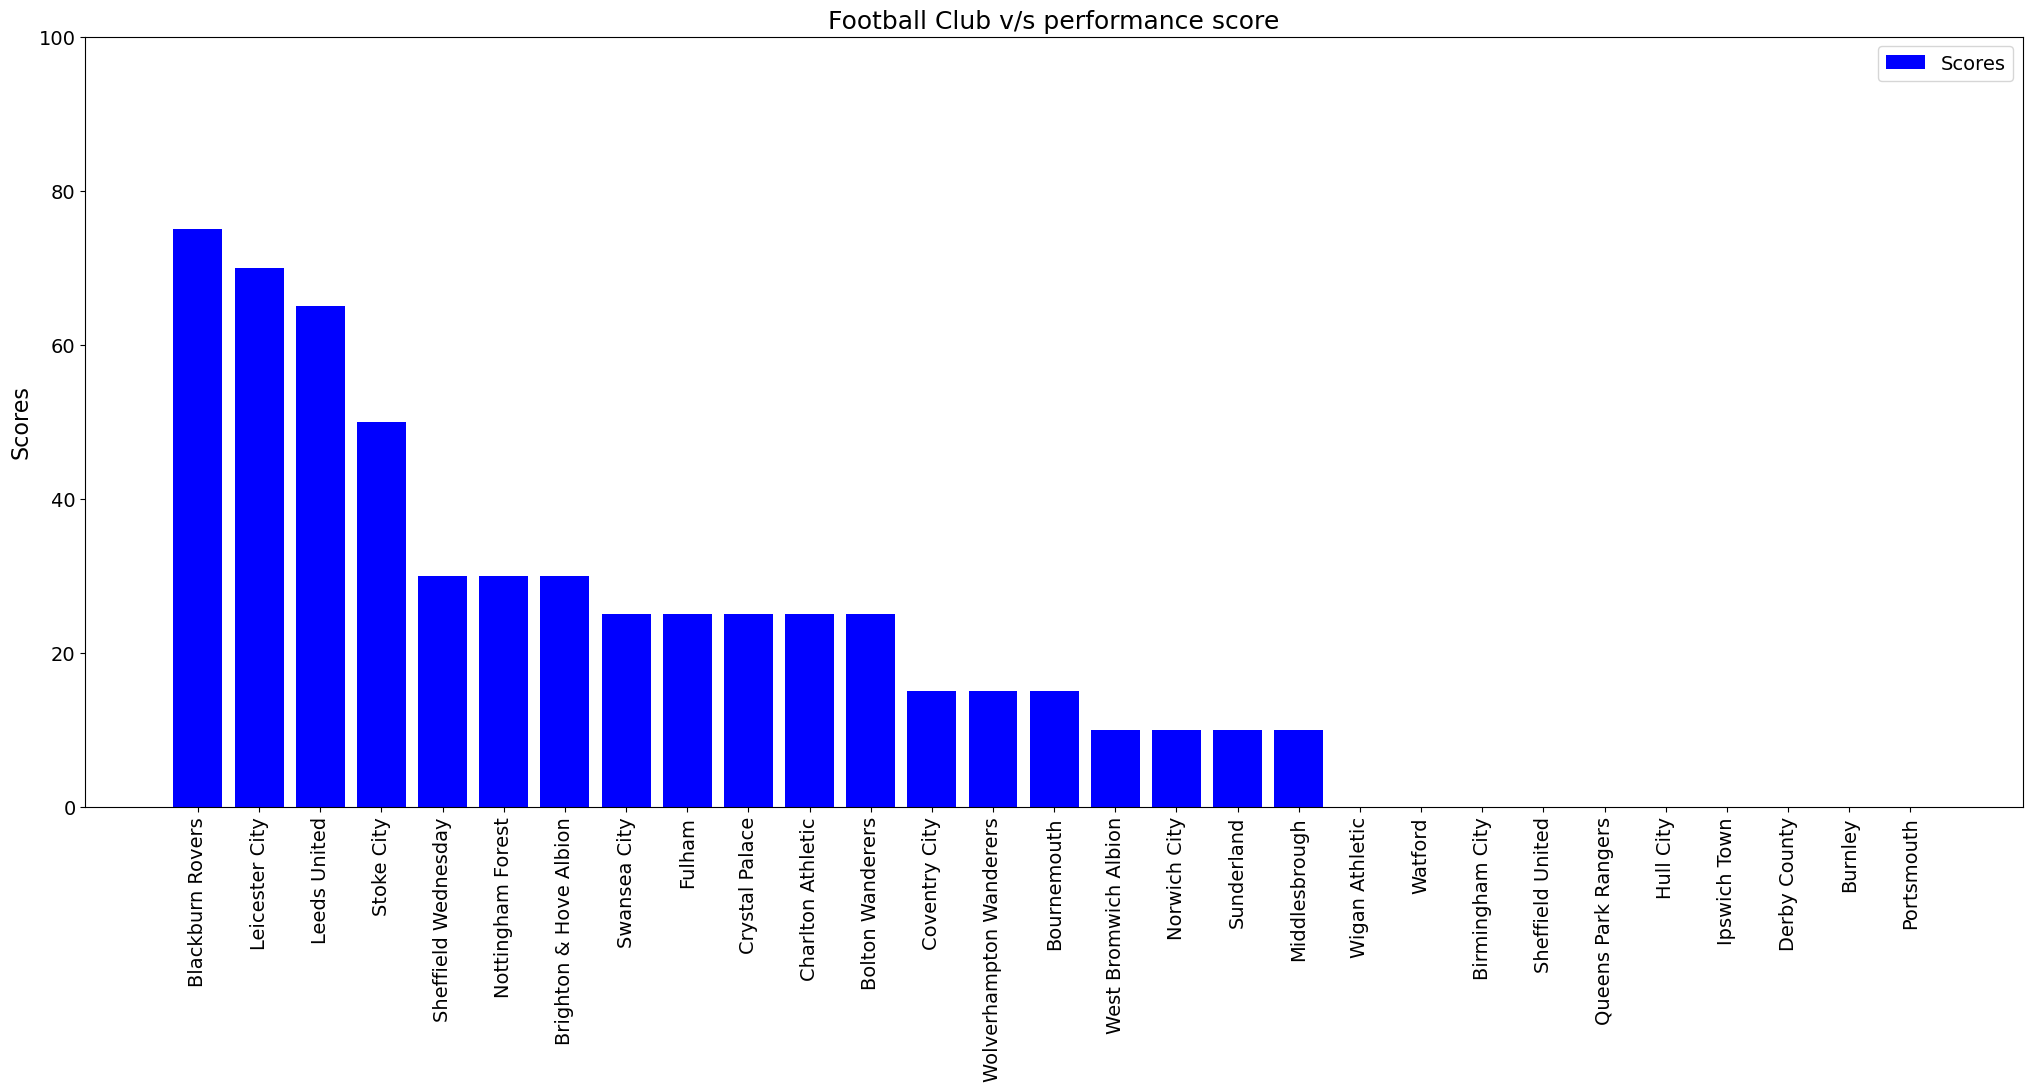

In [68]:
# sort the DataFrame by score in descending order
df_sort = df.sort_values(by='scores', ascending=False)

# create a bar chart of team scores
plt.figure(figsize=(25,10))
plt.bar(df_sort['Club'], df_sort['scores'], color='blue')

# add labels and title to the chart
plt.ylabel('Scores', fontsize=16)
plt.title('Football Club v/s performance score', fontsize=18)

# add legend to explain the blue bars
plt.legend(['Scores'], fontsize=14)

# rotate the team names on the x-axis for readability
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)

# set the y-axis limit to start from 0 and end at 100
plt.ylim(0, 100)

# display the chart
plt.show()

#### Based on the above chart, Blackburn Rovers has the highest score basis our analysis and next best Leicester City

To ensure a thorough evaluation of football club performance we must consider clubs current form.

Let us check the score of those clubs that have played in the last three years. Specifically, suggest including clubs that have played in 2023, as well as those that last played in 2022 and 2021.

This approach allows us to pinpoint those clubs that are currently in good form and have consistently performed well over the past few years.

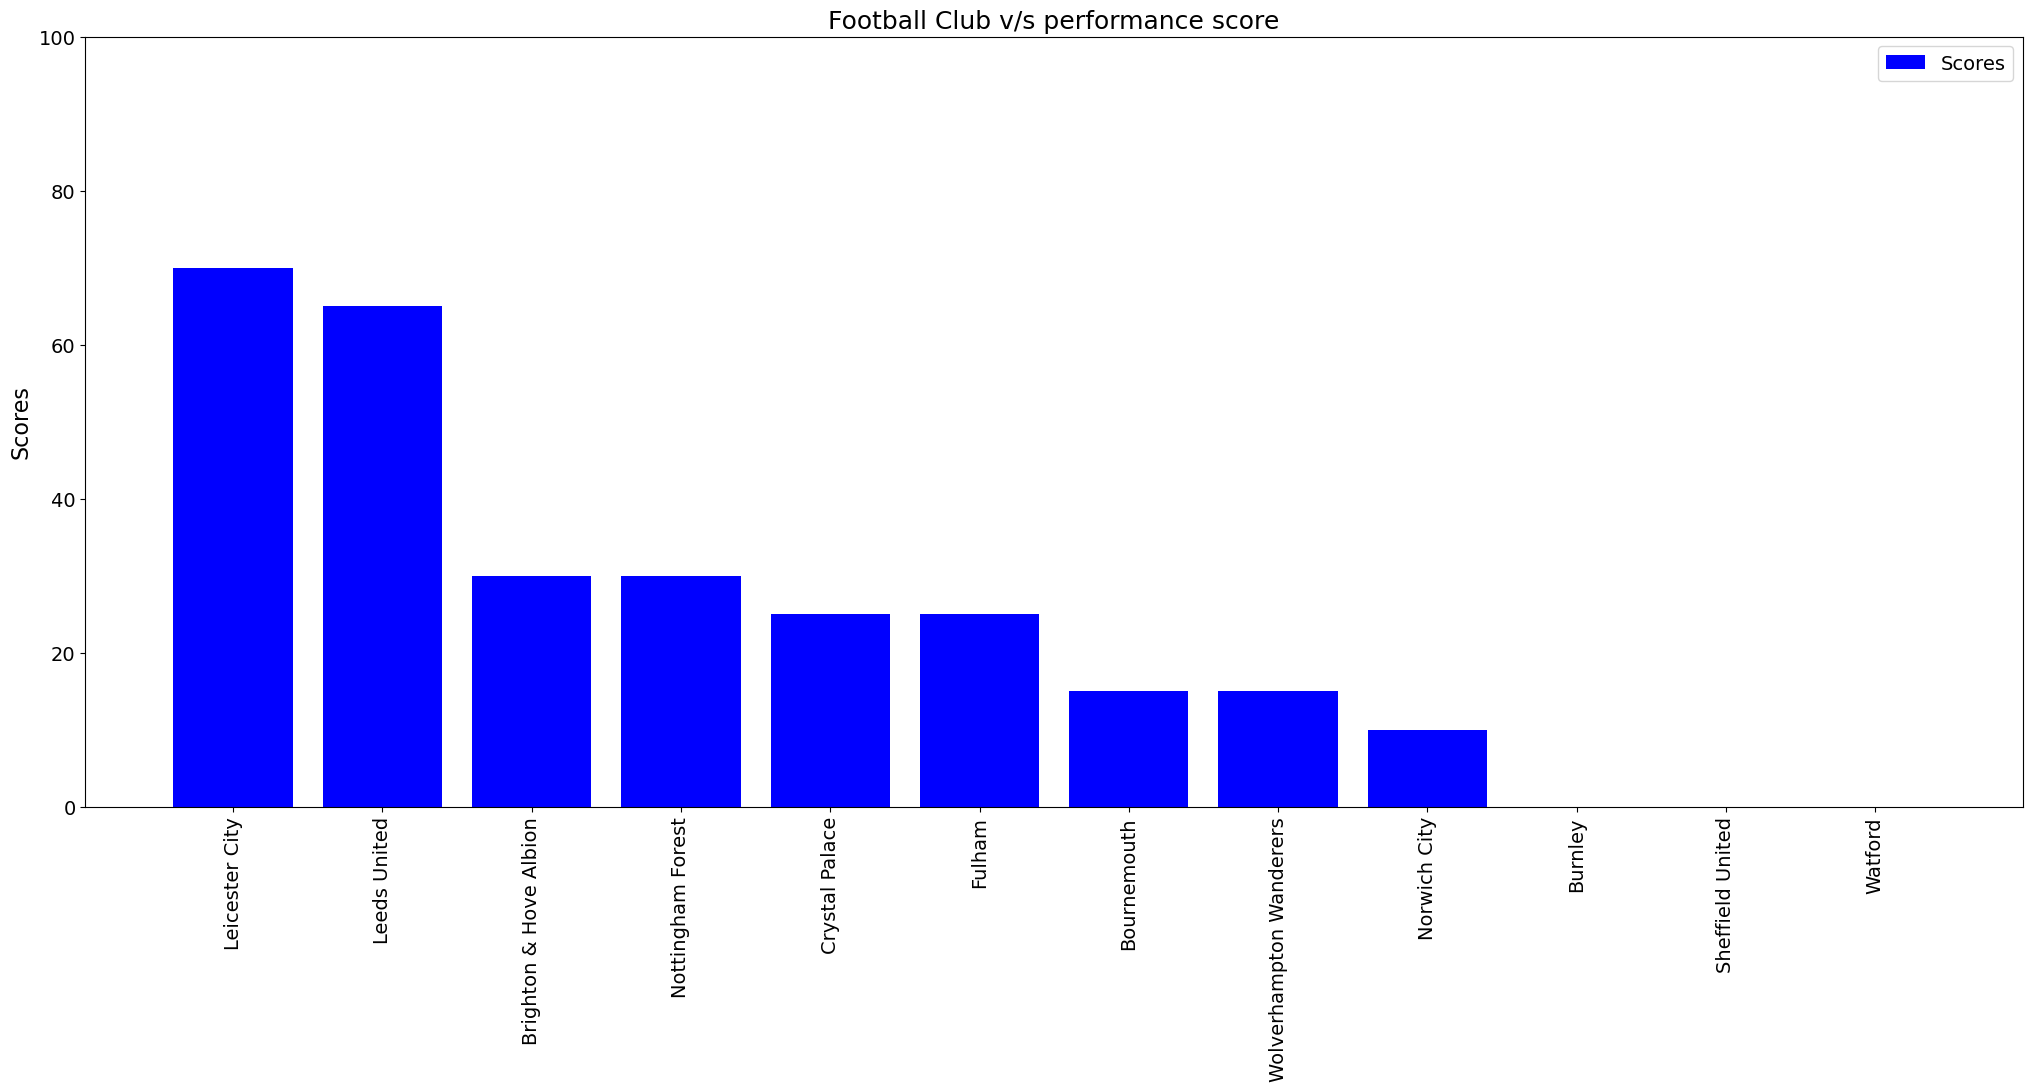

In [69]:
# sort the DataFrame by score in descending order
df_sort = df[(df['lastplayed_pl']==2023) | (df['lastplayed_pl']==2022) | (df['lastplayed_pl']==2021)].sort_values(by='scores', ascending=False)

# create a bar chart of team scores
plt.figure(figsize=(25,10))
plt.bar(df_sort['Club'], df_sort['scores'], color='blue')

# add labels and title to the chart
plt.ylabel('Scores', fontsize=16)
plt.title('Football Club v/s performance score', fontsize=18)

# add legend to explain the blue bars
plt.legend(['Scores'], fontsize=14)

# rotate the team names on the x-axis for readability
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)

# set the y-axis limit to start from 0 and end at 100
plt.ylim(0, 100)

# display the chart
plt.show()

Upon closer examination of the list, we can observe that our current leader, Blackburn Rovers, is not included. To gain a better understanding of their performance, it's necessary to investigate further and determine the last year in which Blackburn Rovers played. This information will provide crucial context to our analysis and enable us to assess their recent form accurately.

In [70]:
df[df['Club']=='Blackburn Rovers']['lastplayed_pl']

1    2012
Name: lastplayed_pl, dtype: int64

Blackburn Rovers last played in the tournament in 2012, which was quite some time ago. Given this information, we recommend that stakeholders consider investing in Leicester City instead. We believe that Leicester City's recent form and performance make them a better choice for investment.

To support our claim, we will conduct further secondary research to provide additional evidence of Leicester City's current form and potential for success

According to our research, Blackburn Rovers were relegated to the Championship league in 2012 i.e., league below Premier League and later to League One in 2017 i.e., league below Championship league. However, they were promoted back to the Championship in 2018 and have since finished in the middle of the table in recent years. Given their inconsistent performance and lack of presence in the Premier League since 2012, it would be inappropriate to recommend this club for investment.

On the other hand, Leicester City, the 2016 Premier League champions, have consistently finished in the top 10 in recent years. They placed 5th in both the 2019-2020 and 2020-2021 seasons and finished 8th in 2021-2022. With sufficient financial backing, Leicester City has the potential to achieve even greater success in the near future. Therefore, it would be reasonable to recommend Leicester City to our clients.

Source 1: https://www.transfermarkt.co.in/blackburn-rovers/platzierungen/verein/164

Source 2: https://www.transfermarkt.co.in/leicester-city/platzierungen/verein/1003

## We recommend investing in Leicester City based on our analysis